# Naive Bayes Classification

Firstly we imported the dataset, the data is based on if the texts are positive/negative implied. We used the head function to learn how the data was structured. This is part of data understanding.

In [2]:
import pandas as pd
Finance = pd.read_csv('https://raw.githubusercontent.com/TomdeFluiter/Project-Data-Mining/refs/heads/main/Finance.csv')
Finance.head()

,Text,Label
0,The financial markets are influenced by a myri...,positive
1,Financial literacy is essential for making inf...,positive
2,"The stock market can be volatile, with prices ...",positive
3,Financial regulations aim to protect investors...,positive
4,Access to credit and capital is essential for ...,positive


We checked to be sure if the only Labels were positive or negative, which they were. This is also part of data understanding.

In [3]:
Finance['Label'].unique()

array(['positive', 'negative'], dtype=object)

Then we made positive and negative into categories otherwise NBC won't work. This is part of data preparation.

In [4]:
from pandas import CategoricalDtype

catType = CategoricalDtype(categories=["positive","negative"], ordered=False)
Finance.Label = Finance.Label.astype(catType)
Finance.Label

0     positive
1     positive
2     positive
3     positive
4     positive
5     negative
6     negative
7     positive
8     negative
9     positive
10    positive
11    positive
12    negative
13    positive
14    positive
15    negative
16    positive
17    positive
18    positive
19    positive
20    negative
21    positive
22    positive
23    positive
24    negative
25    positive
26    negative
27    positive
28    negative
29    positive
30    positive
31    positive
32    negative
33    positive
34    negative
35    positive
36    positive
37    positive
38    negative
39    positive
40    positive
41    positive
42    positive
43    positive
44    positive
45    negative
46    positive
47    negative
Name: Label, dtype: category
Categories (2, object): ['positive', 'negative']

Then we watched how many values of positive and negative there were and the percentages. This is part of data understanding.

In [5]:
Finance.Label.value_counts()

Label
positive    34
negative    14
Name: count, dtype: int64

In [6]:
Finance.Label.value_counts(normalize=True)

Label
positive    0.708333
negative    0.291667
Name: proportion, dtype: float64

We used a wordcloud to show which words were most commonly used in the positive/negative texts. First we had to install wordcloud and after that we implemented the wordcloud and used the color green for positive and red for negative. Interesting was seeing how important it is to use upper and lowercases. Because 'Financial' is mostly used in positive texts, while 'financial' is mostly used in negative texts. This is part of data understanding.

In [7]:
!pip install wordcloud

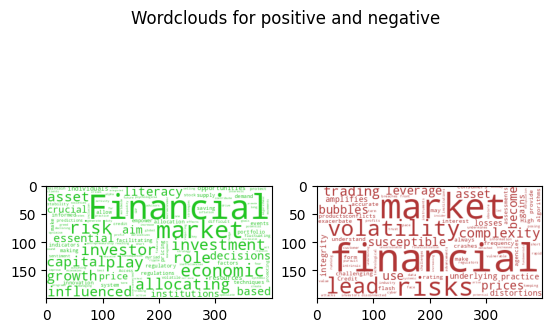

In [8]:
from matplotlib import colors, pyplot as plt
from wordcloud import WordCloud

positiveText = ' '.join([Text for Text in Finance[Finance['Label']=='positive']['Text']])
negativeText = ' '.join([Text for Text in Finance[Finance['Label']=='negative']['Text']])
colorListpositive = ['#21c521']
colorListnegative=['#b03636']
colormappositive=colors.ListedColormap(colorListpositive)
colormapnegative=colors.ListedColormap(colorListnegative)
wordcloudpositive = WordCloud(background_color='white', colormap=colormappositive).generate(positiveText)
wordcloudnegative = WordCloud(background_color='white', colormap=colormapnegative).generate(negativeText)

fig, (wc1, wc2) = plt.subplots(1, 2)
fig.suptitle('Wordclouds for positive and negative')
wc1.imshow(wordcloudpositive)
wc2.imshow(wordcloudnegative)
plt.show()

Then we vectorized the texts to get the number of uses per text per word in columns, so we could use NBC. This is data preparation.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(Finance['Text'])
Finance_words = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())
Finance_words.head()

,about,access,accurate,achieving,act,active,activity,address,adjusted,advancements,...,use,used,value,variety,volatile,volatility,vulnerable,when,with,worldwide
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.332823,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.309396,0.0,0.0,0.0,0.258319,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.362349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


After vectorizing the texts, we made the training and test data for the NBC and used NBC. The accuracy score of NBC was 70%, which is not especially high. We will go further on this later on. We also tried to change the test size, but the best results were giving with test size 0.2. This is part of modelling.

In [10]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(Finance_words, Finance.Label, test_size=0.2, random_state=42)
print("Training set shape:",xTrain.shape)
print("Testing set shape:",xTest.shape)

Training set shape: (38, 305)
Testing set shape: (10, 305)


In [11]:
from sklearn.naive_bayes import MultinomialNB

bayes = MultinomialNB()
bayes.fit(xTrain, yTrain)

MultinomialNB()

In [12]:
from sklearn.metrics import accuracy_score


yPred = bayes.predict(xTest)
yTrue = yTest
accuracyScore = accuracy_score(yTrue, yPred)
print(f'Accuracy: {accuracyScore}')

Accuracy: 0.7


Then we created an array and (confusion)matrix of the NBC, to see how good the data predicted when the texts were labeled positive or negative. However the data we used doesn't include much data, that's why the accuracy scores so low and it means that these testing results aren't very trustworthy. It is worse for the test results to predict it was a positive text, when it actually was a negative text then vice versa. So the 30% that went wrong, went in the worst way wrong. We also applied the same features as with the KNN/XGBoost (confusion)matrix, but instead of using blue we went with green for this one. This is part of the evaluation step as well as the deployment step of the CRISP DM model.

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(yTest, yPred, labels=["positive","negative"])
cm

array([[7, 0],
       [3, 0]])

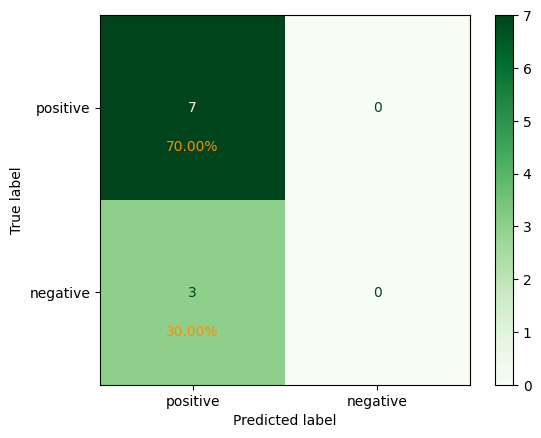

In [17]:
cm_percentage = cm.astype('float') / cm.sum() * 100
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["positive","negative"])
disp.plot(cmap=plt.cm.Greens)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if cm_percentage[i, j] > 0: #dit laat de 0% waardes niet zien
            plt.text(j, i+0.25, f"{cm_percentage[i, j]:.2f}%", 
                 ha="center", va="bottom", color="darkorange")
plt.show()